In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("adult.csv", header=1, skipinitialspace=True, na_values='?', thousands=',', names=['Age','Workclass','Fnlwgt','Education','Education-Num','Marital-Status','Occupation','Relationship','Sex','Capital-Gain','Capital-Loss','Hours-Per-Week','Country','Income'])
data.head()

data.Sex.value_counts()


Male      32649
Female    16192
Name: Sex, dtype: int64

### 1. Analysis the distribution of all work classes for different genders using an appropriate visualization technique. Use appropriate features for your visualization, See Figure 4. Note that you might need to add more features to this visualization e.g., labels, legend etc...

Text(0, 0.5, 'Work Class')

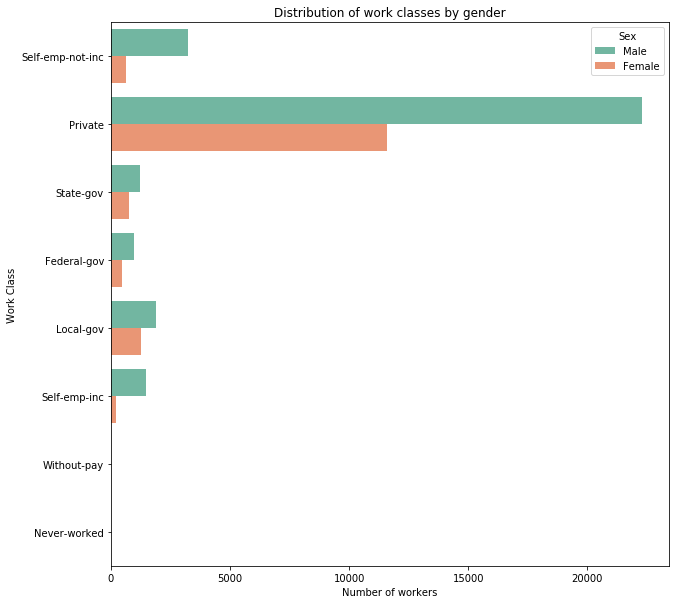

In [2]:
# 1. Get a dataframe only with the columns for workclass and gender
# workclass_gender = workclass[['workclass', 'sex']]
workclass_gender = data[['Workclass', 'Sex']]

chart = sns.countplot(y='Workclass', hue='Sex', data=workclass_gender, palette='Set2')
chart.figure.set_size_inches(10,10)

plt.title('Distribution of work classes by gender')
plt.xlabel('Number of workers')
plt.ylabel('Work Class')


### 2. Investigate the relationship between the level of education and their hours of work per week for females only. Which education level has a larger variety of working hours? Use a visualization technique with appropriate features to show the result.

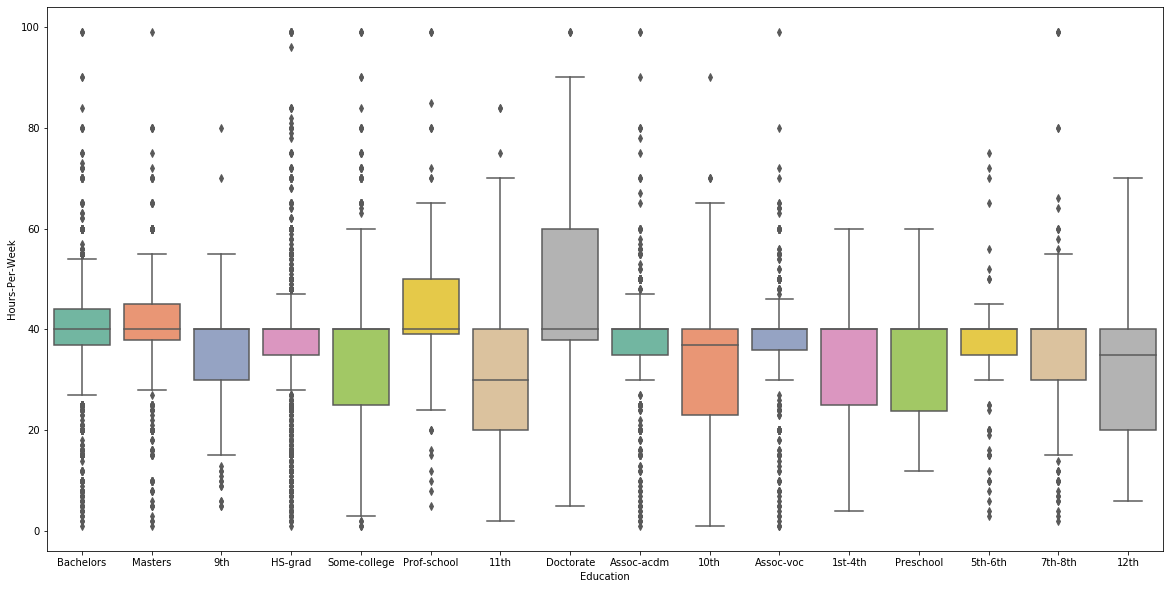

In [3]:
females = data[data["Sex"] == "Female"]
g = females[['Education','Hours-Per-Week']]

chart = sns.boxplot(x='Education', y='Hours-Per-Week', data=g, palette='Set2')
chart.figure.set_size_inches(20,10)



### Use a visualization technique and depict which country has the maximum entry in the dataset.

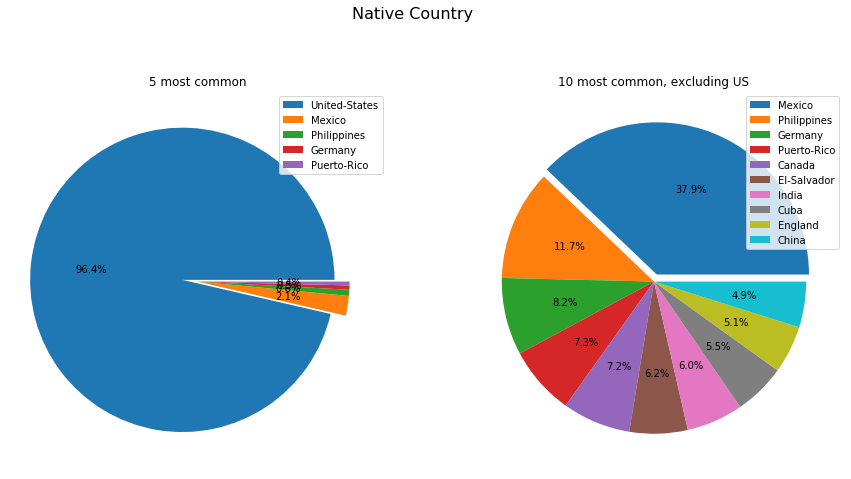

In [4]:
countries = data['Country'].value_counts()

countries_all = countries[:5]
countries_no_us = countries[1:][:10]

fig, axs = plt.subplots(1, 2)

axs[0].pie(countries_all, explode=(0.1,0,0,0,0), autopct='%1.1f%%')
axs[1].pie(countries_no_us, explode=(0.05,0,0,0,0,0,0,0,0,0), autopct='%1.1f%%')

fig.suptitle('Native Country', fontsize=16)

axs[0].set_title("5 most common")
axs[0].legend(countries_all.keys())

axs[1].set_title("10 most common, excluding US")
axs[1].legend(countries_no_us.keys())

fig.set_size_inches(15, 8)



###  Repeat the previous analysis but this time exclude the country which has the maximum entry and depict which two countries have the maximum of entries.

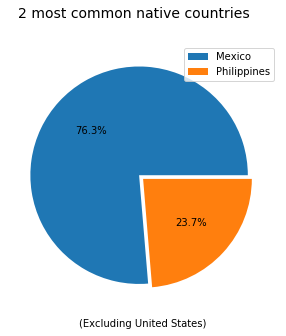

In [5]:
countries = data['Country'].value_counts()
countries_no_us = countries[1:][:2]

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.suptitle('2 most common native countries', fontsize=14)
plt.xlabel("(Excluding United States)")

plt.pie(countries_no_us, explode=(0.05,0), autopct='%1.1f%%')
plt.legend(countries_no_us.keys())



### Investigate the relationship between age and working hours. Use a visualization technique with appropriate features to show the result. Which age interval has higher working hours. Use annotation and show a point that has relatively the maximum working hours.

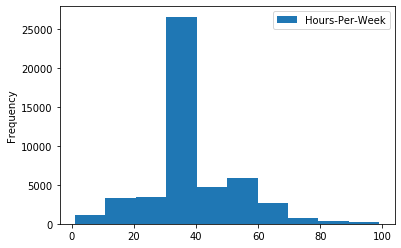

In [80]:
df = data[['Age', 'Hours-Per-Week']].dropna()

# df = df.groupby('Age').mean()
# df = df.groupby('Age')['Hours-Per-Week']

df.plot(x='Age', y='Hours-Per-Week', kind='hist', bins=10)
# sns.distplot(df["Age"], 20, hist=True)

# sns.countplot(x="Age", data=df)


